# BA 820 Homework 2

Group Name: B9
Member Names: Kaan Kazancoglu

Reminder: you should not be sharing code across groups

## Question 1: Clustering emails using Gaussian Mixture Models [50 pts]

For this problem, we will be analyzing emails taken from the [Enron Email Dataset](https://www.cs.cmu.edu/~enron/). We have already curated the data for you in the `data/enron` directory, with one file per email (so there is no need to redownload the dataset as it is already included in this homework zip archive). The dataset includes a combination of "spam" and "ham" emails. Spam emails are unsolicited messages intended to sell a product or scam users into providing personal information, while ham emails represent everything that is not spam.

The language used in spam emails tends to be considerably different from typical business emails. Most spam filters leverage this difference in word frequencies to detect spam as it arrives and filter it out of email inboxes. We will use Gaussian Mixture Models (GMMs) to cluster the emails and attempt to identify groups of emails which are likely to be spam.

### Part A: Construct a list of processed documents [10 points]

Provided below is a function that returns a document present in a file given a filename. The function performs some preprocessing to (1) remove punctuation, (2),(3) remove whitespace and (4) lowercase all words. Using the `make_word_list` function, construct a list of processed documents.

In [232]:
import re
import string
import codecs

def make_word_list(path):
    
    with codecs.open(path, "r", encoding='utf-8', errors='ignore') as f:
        corpus_text = f.read()

    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "")  # -- (1)
    
    text = re.sub(r'\S*\d\S*', '', corpus_text) # -- (2)
    text = re.sub(r'[^\w\s]', '', text)         # -- (3)
    
    text = text.lower().split()           # -- (4)         
    
    li = []
    for token in text:
        li.append(token)

    return " ".join(li)



In [10]:
########################################################################
######################### 
#0005.2001-06-23.txt
#'./data/enron/2590.2000-09-18.txt' : length 2939
import glob

documents = glob.glob("./data/enron/*.txt")
processed_doc_list = []

def make_word_list(path):
    
    with codecs.open(path, "r", encoding='utf-8', errors='ignore') as f:
        corpus_text = f.read()

    for c in string.punctuation:
        corpus_text = corpus_text.replace(c, "")  # -- (1)
    
    text = re.sub(r'\S*\d\S*', '', corpus_text) # -- (2)
    text = re.sub(r'[^\w\s]', '', text)         # -- (3)
    
    text = text.lower().split()           # -- (4)         
    #removed the unnecessary part about "converting list to string then to list again" and modified the code   
    processed_doc = " ".join(text)
    
    return processed_doc_list.append(processed_doc)

for doc in documents:
    
    make_word_list(doc)
    
len(processed_doc_list)

#########################
########################################################################

5171

### Part B: Construct a document matrix [10 points]

Next, construct a document matrix `X` as a matrix of [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) features for each document. TF-IDF features encode information about the word frequency within a document, weighted by the frequency of the same word for corpus as a whole.

   - Use the `TfidfVectorizer` from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) to create the document matrix `X`.
   - Set `min_df=50`; this drops words that don't occur in at least 50 documents.
   - Set `stop_words="english"` and `max_df=0.8` to filter out stop-words.
   - Print the number of unique words in the vocabulary Hint: Look for the `vocabulary_` attribute in the `TfidfVectorizer` object after fitting the vectorizer to the data set. The vocabulary will also be needed in part (d).

In [233]:
########################################################################
######################### 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=50, stop_words="english", max_df=0.8)


X_sparse = vectorizer.fit_transform(processed_doc_list)

X = X_sparse.toarray()

print(type(X_sparse))

# Densed matrix X:
print(type(X))


# length of vocab (1)
print(X.shape[1])
# length of vocab (2)
print(len(vectorizer.vocabulary_))
#########################
########################################################################

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>
1680
1680


### Part C: Perform Clustering [10 points]

Perform clustering on the document matrix `X` using GMMs. 
- Use the `GaussianMixture` module from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) to cluster the documents.
- Set the number of clusters (mixture components) to 3.
- Print the number of documents assigned to each cluster.

In [21]:
########################################################################
######################### 

import numpy as np
from sklearn.mixture import GaussianMixture

clusters = 3
gmm = GaussianMixture(n_components = clusters, random_state = 11)

gmm.fit(X)

print("Number of documents in each cluster:\n")
   
for i in range(len(gmm.weights_)):
    print("Cluster",str(i),":",round(gmm.weights_[i]*5171))


#Alternative way of printing the number of documents in each cluster using predict() method: 
#predicted = gmm.predict(X)
#for i in range(len(gmm.weights_)):
#    print((predicted == i).sum())

#########################
########################################################################

Number of documents in each cluster:

Cluster 0 : 2607
Cluster 1 : 2200
Cluster 2 : 364


### Part D: Characterize the clusters [10 points]

Now, we will attempt to characterize the clusters based on the frequency of spam-relevant words. 
- Select 3 "spammy" words from the vocabulary that you expect to occur frequently in spam emails and less frequently in normal business emails (e.g., 'click', 'www', 'offer'). Construct a list, `spam_indices`, storing the indices of the spammy words you selected in the vocabulary generated by `TfidfVectorizer`.
- Select 3 "hammy" words from the vocabulary you think will occur frequently in business emails and infrequently in spam emails (e.g., 'meeting', 'attached', 'review'). Construct a list, `ham_indices`, storing the indices of the hammy words you selected in the vocabulary generated by `TfidfVectorizer`.
- Use the function provided below, `plot_spam_words_by_cluster`, to plot the average TF-IDF features for your selected spammy words and hammy words for each cluster. The function takes the following parameters:
    - `X` is a matrix of TF-IDF features (rows index documents, columns index terms).
    - `predicted` is predicted cluster assignments returned by `GaussianMixture.predict()`
    - `n_clusters` is the number of clusters. This should match the number of clusters from your GMM.
    - `spam_indices` is a list of indices of spammy words in the vocabulary.
    - `ham_indices` is a list of indices of hammy (typical business) words in the vocabulary.

In [19]:
def plot_spam_words_by_cluster(X, predicted, n_clusters, spam_indices, ham_indices):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Calculate mean TF-IDF features for each cluster
    mean_tfidf_spam = []
    mean_tfidf_ham = []
    for spam in spam_indices:
        mean_tfidf_spam.append([])
    for ham in ham_indices:
        mean_tfidf_ham.append([])
    
    for i in range(n_clusters):
        for j, spam_idx in enumerate(spam_indices):
            mean_tfidf_spam[j].append(X[predicted==i, spam_idx].mean())
        for j, ham_idx in enumerate(ham_indices):
            mean_tfidf_ham[j].append(X[predicted==i, ham_idx].mean())
    
    # Generate plot
    fig, ax = plt.subplots()

    ind = np.arange(n_clusters)    # the x locations for the groups
    width = 0.10         # the width of the bars

    # Plot spam bars
    for i, val in enumerate(mean_tfidf_spam):
        spam_bar = ax.bar(ind - (len(mean_tfidf_spam)-i-1)*width, val, width, color='r', bottom=0)

    # Plot ham bars
    for i, val in enumerate(mean_tfidf_ham):
        ham_bar = ax.bar(ind + (len(mean_tfidf_ham)-i)*width, val, width,
                color='y', bottom=0)

    ax.set_title('Mean TF-IDF Features by Cluster for Spam-Relevant Words')
    ax.set_xticks(ind + width / 2)
    xticklabels = []
    for i in range(n_clusters):
        xticklabels.append('Cluster ' + str(i) + '\n(n=' + str((predicted==i).sum()) + ')')
    ax.set_xticklabels(xticklabels)

    ax.legend((spam_bar[0], ham_bar[0]), ('Spammy words', 'Hammy words'))
    ax.autoscale_view()
    ax.set_ylabel('Mean TF-IDF')
    plt.show()

[238, 1670, 998]
[904, 108, 1283]


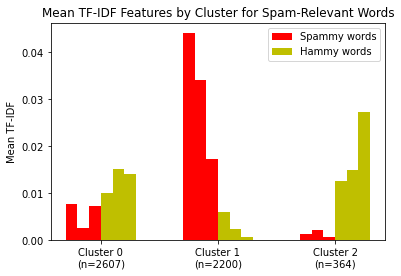

In [22]:
########################################################################
######################### 
predicted = gmm.predict(X)
n_clusters = clusters

spam_indices = []
ham_indices = []

#spammy:
for word in ['click', 'www', 'offer']:
    spam_indices.append(vectorizer.vocabulary_[word])
#hammy:    
for word in ['meeting', 'attached', 'review']:
    ham_indices.append(vectorizer.vocabulary_[word])
    
print(spam_indices)
print(ham_indices)

#plot:
plot_spam_words_by_cluster(X, predicted, n_clusters, spam_indices, ham_indices)

#########################
########################################################################

### Part E: Interpret results [10 points]

From the plot generated in part (d), do any of the clusters correspond to spam emails, based on the frequency of spammy and hammy words? Do any of the clusters appear to correspond to typical business emails (ham)? 

Re-run your analysis with a different choice for the number of clusters in your GMM (e.g., `n_clusters=5` or `n_clusters=2`). How does changing the number of clusters affect your results? Does one choice of `n_clusters` appear better than another for locating clusters of spam emails?

*** According to plot in part d, Cluster 1 corresponds to spam emails whereas Cluster 0 and Cluster 2 corresponds to ham emails based on the frequencies of choosen hammy and spammy words. I re-ran the analysis with different number of clusters based on the calinski_harabasz_scores I calculated in a different jupyter notebook, found that k=8 has the best score with 88.35. However, after setting k=8, while I have observed more definitive clusters in terms of the distributions of hammy/spammy words, I have also noticed that number of documents per cluster decreased significantly, therefore some clusters have been formed by containing only one or two word. I believe this might lead us harder to interpret the characters of each cluster.  ***

[238, 1670, 998]
[904, 108, 1283]


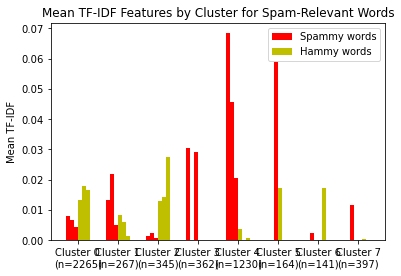

In [92]:
########################################################################
######################### 
clusters = 8
gmm = GaussianMixture(n_components = clusters, random_state = 11)
gmm.fit(X)
predicted = gmm.predict(X)
n_clusters = clusters

spam_indices = []
ham_indices = []

#spammy:
for word in ['click', 'www', 'offer']:
    spam_indices.append(vectorizer.vocabulary_[word])
#hammy:    
for word in ['meeting', 'attached', 'review']:
    ham_indices.append(vectorizer.vocabulary_[word])
    
print(spam_indices)
print(ham_indices)

#plot:
plot_spam_words_by_cluster(X, predicted, n_clusters, spam_indices, ham_indices)

#########################
########################################################################

## Question 2: Latent "Purposes" in Mobile Apps [50 points]


Think of Android applications as "documents", where "words" are the "permissions" that each app requests. Each app has a set of latent "purposes" (topics); a "purpose" may be a specific task (such as taking photographs and uploading them to the internet), and an application may have a mixture of purposes of varying strength.

Can we uncover these purposes from a dataset of Android applications and the permissions they request?

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Part A: Load the data [0 points]

The [dataset](http://www.mariofrank.net/andrApps/) contains ~180,000 applications from the Android app store, including each app's name, description and permissions requested. For more about Android app permissions, see [this report](http://www.pewinternet.org/2015/11/10/an-analysis-of-android-app-permissions/).

   * Download the data and unzip it into the same folder as this notebook.
   * Rename the CSV file to "android.csv".
   * Run the cells below to load the data into the notebook.

This may take up ~2GB of RAM.

In [32]:
df = pd.read_csv("android.csv", sep=",",  thousands=",")

In [33]:
df["Number of ratings"] = df["Number of ratings"].astype(int) # fix data type
df = df.drop_duplicates(subset=["App"]).reset_index(drop=True)

In [34]:
df.head(n=3)
df.shape

(180295, 183)

### Part B: Convert each app into a "document" [0 points]

The code below does the following:

   * Filter out all the columns except the permission columns.
   * Convert this dataframe into a numpy matrix.

There are thus 180295 apps (documents) and 173 permissions (words).

   - `X` is the "document" or "word-frequency" matrix.
   - `permission_columns` contains the words ordered by their column index in X.
   - `app_names` contains the application names ordered by their row index in X.
   - `app_ratings` contains the *number* of application ratings (not the ratings themselves).

In [58]:
permission_columns = list(df.columns[10:])
app_names = list(df["App"])
app_ratings = np.array(df["Number of ratings"])
df_perms = df[permission_columns]
X = df_perms.values
permission_columns
#X[:10]
#del df # uncomment to free up RAM
#del df_perms # uncomment to free up RAM

['Default : Access DRM content. (S)',
 'Default : Access Email provider data (S)',
 'Default : Access all system downloads (S)',
 'Default : Access download manager. (S)',
 'Default : Advanced download manager functions. (S)',
 'Default : Audio File Access (S)',
 'Default : Install DRM content. (S)',
 'Default : Modify Google service configuration (S)',
 'Default : Modify Google settings (S)',
 'Default : Move application resources (S)',
 'Default : Read Google settings (S)',
 'Default : Send download notifications. (S)',
 'Default : Voice Search Shortcuts (S)',
 'Default : access SurfaceFlinger (S)',
 'Default : access checkin properties (S)',
 'Default : access the cache filesystem (S)',
 'Default : access to passwords for Google accounts (S)',
 'Default : act as an account authenticator (S)',
 'Default : bind to a wallpaper (S)',
 'Default : bind to an input method (S)',
 'Default : change screen orientation (S)',
 'Default : coarse (network-based) location (S)',
 'Default : control

### Part C: Downweight "stopwords" [2.5 points]

There are some permissions requested by almost all applications (like "INTERNET"), they are similar to stop-words ("the", "and", etc.) in natural language. We can downweight them by TF-IDF normalization.

   * Use the `TfidfTransformer` class in `scikit-learn` to transform X.

In [47]:
########################################################################
######################### 

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
tfidf

#########################
########################################################################

<180295x173 sparse matrix of type '<class 'numpy.float64'>'
	with 612284 stored elements in Compressed Sparse Row format>

### Part D: Discover 10 "topics" [2.5 points]

   * Use the `LatentDirichletAllocation` class in `scikit-learn` to fit 10 topics to the data.
   * Use 10 max iterations, set `n_jobs=-1` to use all cores on your machine (if it helps).
   * Feel free to understand and play around with other parameters.
   * This may take around 3 minutes to run.

In [238]:
%%time
########################################################################
######################### 

#using learning_method='online' because the data size is very large.
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=10,
                                learning_method='online', n_jobs=-1,
                                random_state=0)


lda.fit(tfidf)


#########################
########################################################################

CPU times: user 1min 19s, sys: 6.56 s, total: 1min 26s
Wall time: 1min 54s


LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=0)

In [151]:
print(tfidf)

  (0, 171)	0.18350513998217455
  (0, 165)	0.14680027363978176
  (0, 145)	0.10476925928242804
  (0, 144)	0.10827677744645378
  (0, 142)	0.2170927897097771
  (0, 141)	0.23811087509232562
  (0, 140)	0.37738825702912665
  (0, 139)	0.2496371578643755
  (0, 138)	0.1669259449195421
  (0, 126)	0.4486064270266414
  (0, 112)	0.1651275802984702
  (0, 106)	0.11271839148342057
  (0, 95)	0.20822966545774532
  (0, 90)	0.19935809061526952
  (0, 88)	0.13635261646511806
  (0, 86)	0.08532587181481394
  (0, 84)	0.14385676244868395
  (0, 83)	0.09069886117189749
  (0, 80)	0.07160855204898149
  (0, 79)	0.13623490833395224
  (0, 78)	0.17826996166593922
  (0, 76)	0.052904865610962575
  (0, 73)	0.32296309872902457
  (0, 69)	0.17849294376409255
  (0, 68)	0.10997859690428329
  :	:
  (180289, 144)	0.38742450930089006
  (180289, 84)	0.5147330472488257
  (180289, 83)	0.3245290690429833
  (180289, 80)	0.25622214470728616
  (180289, 79)	0.48746133525293456
  (180289, 76)	0.18929859275774005
  (180290, 76)	0.4334976855

Now each app can be viewed as a distribution over these 10 topics, and each topic is a distribution over all the permissions in the data.

### Part E: List the top 10 "words" in each topic [15 points]

Do any of the topics correspond to meaningful app "purposes"? List the ones you find meaningful below:

   * Topic #i: "your interpretation"

In [237]:
########################################################################
######################### 
#permission_columns contains the words ordered by their column index in X.
#app_names contains the application names ordered by their row index in X.

top_10 = 10
for idx, topic in enumerate(lda.components_):
    
    topic_x = "Topic " + str(idx+1) + ":" + "\n" + "\n".join([str(permission_columns[i])
                         for i in topic.argsort()[:-top_10 - 1:-1]])
    print(topic_x,"\n")

#########################
########################################################################

Topic 1:
Your location : coarse (network-based) location (D)
Your location : fine (GPS) location (D)
Network communication : full Internet access (D)
Network communication : view network state (S)
Phone calls : read phone state and identity (D)
Storage : modify/delete USB storage contents modify/delete SD card contents (D)
Hardware controls : record audio (D)
Your location : access extra location provider commands (S)
Default : permission to install a location provider (S)
Network communication : download files without notification (S) 

Topic 2:
Hardware controls : control vibrator (S)
System tools : prevent device from sleeping (D)
Network communication : full Internet access (D)
Storage : modify/delete USB storage contents modify/delete SD card contents (D)
Network communication : view network state (S)
System tools : allow Wi-Fi Multicast reception (D)
Default : force application to close (S)
Phone calls : read phone state and identity (D)
Default : modify/delete USB storage conten

*** I think its very ambiguous to interpret what each topic translates to by only checking the top 10 permissions because most of the topics consists the same permissions. Below are the topics I was able to identify:
topic 1: might be navigations apps, but most probably it can be apps that requires or asks for location of users.
topic 2: vibrator apps
topic 3: system settings apps
topic 5: wall papers apps
topic 10: messaging apps
***

### Part F: For each topic, list the top 3 apps with at least 100000 ratings having the highest probability assigned to that topic [15 points]

   - This further helps us understand what the topics actually mean.
   - However, the data is noisy and this exercise may result in listing a bunch of obscure apps.
   - Hence, filtering out all apps with less than 100000 ratings may help.

In [235]:
########################################################################
#########################


#prop_of_tops demostrates document-topic (app-topic) weights. 10 different float numbers,
#each corresponds to normalized proportion of the apps under relevant topic (1-10).
prop_of_tops = lda.transform(tfidf)

#defining a boolean array, conditioned to see whether an app has more than 100000 ratings:
#I will use this array to skip the apps that have less than 100000 ratings
popular_apps = app_ratings > 100000


#I used nested for loop to access each topic (outer loop) then to access top three apps (inner loop)
for topic in range(10):
    #using np.argsort() to sort the indices in descending order based on the proportion
    idx = np.argsort(prop_of_tops[:,topic])[::-1]
    counter = 1
    print('Topic', str(topic+1), ':')    
    for app_id in idx:
        if popular_apps[app_id]==False:
            continue
        if counter == 4:
            break
        app = app_names[app_id]
        print(app)
        counter += 1
    print()


#########################
########################################################################

Topic 1 :
Air Control Lite
Dictionary.com
Paper Toss

Topic 2 :
Tank Hero
Robo Defense FREE
Alchemy

Topic 3 :
SpeechSynthesis Data Installer
Ringdroid
Google Sky Map

Topic 4 :
Seesmic (Facebook, Twitter)
Zynga Poker
Dolphin Browser™ HD

Topic 5 :
Strip Poker
Wallpapers HD
Shazam

Topic 6 :
Yoo Ninja! Free
Angry Birds Seasons
Adobe Reader

Topic 7 :
Netflix
Ant Smasher Free Game
Bunny Shooter

Topic 8 :
Blast Monkeys
Racing Moto
My Country

Topic 9 :
Tiny Flashlight + LED
Battery Widget
Inotia3: Children of Carnia

Topic 10 :
WhatsApp Messenger
chompSMS
Gmail



In [164]:
prop_of_tops = lda.transform(tfidf)
np.argsort(prop_of_tops[:,0])[::-1]
np.argsort(prop_of_tops[:,0])
#sum(topic_prop[:,0]<1)

array([122322, 157239,  84832, ..., 162831, 117221, 170207])

### Part G: Visualize the document-topic proportion matrix in 2-D using t-SNE [15 points]

Does our reduced dimensional space contain any structure? Visualize the documents (in the topic-space) using t-SNE.

   * Use `TSNE` from `scikit-learn`.
   * Set the angle to 0.99 and init to 'PCA'. Pick any learning rate that gives you a visually pleasing result.
   * You may `fit` TSNE to a sample of the data (>1000 documents) instead of the full data.
   * Remember to call `fit_transform` to obtain your 2-D data.
   * Plot the t-SNE dimensions as a scatterplot.
   * Color each point based on its most probable topic. Make sure you include a legend (10 colors).
   
Clusters in the t-SNE plot indicate groups of apps that have similar topics.

/Users/kaankazancoglu/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


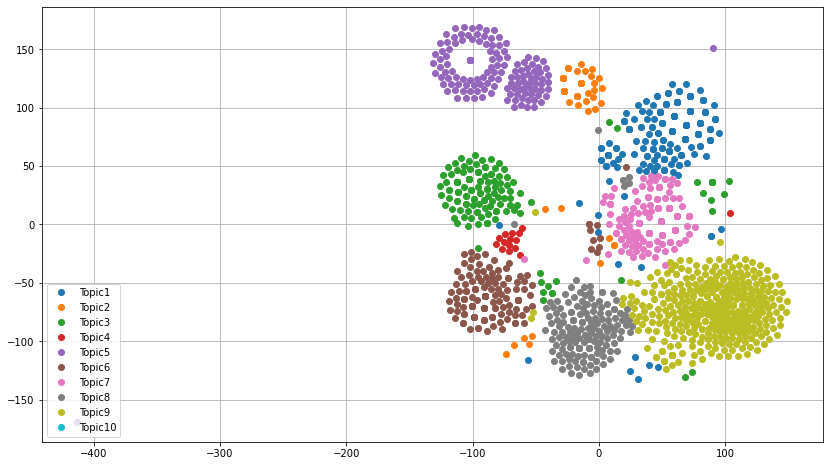

CPU times: user 1min 9s, sys: 13.2 s, total: 1min 22s
Wall time: 16.1 s


In [236]:
%%time
########################################################################
######################### 
from sklearn.manifold import TSNE
tsne = TSNE(angle=0.99, init='pca',
            learning_rate=4000, perplexity=300,
            random_state=0)

tsne_lda = tsne.fit_transform(prop_of_tops[:2000,:])
plt.figure(figsize=(14,8))

top_2000_topic = np.argmax(prop_of_tops, axis=1)[:2000]
for topic in range(10):
    plt.plot(tsne_lda[top_2000_topic==topic+1,0], tsne_lda[top_2000_topic==topic+1,1], 'o',
            label="Topic" + str(topic+1))
    
plt.legend(loc='lower left')
plt.grid()
plt.show()


#plt.scatter(drug_data_normalized_tsne2d[:, 0], drug_data_normalized_tsne2d[:, 1])
#plt.axis('equal')

#########################
########################################################################